In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Reading ExcelFile.
xls = pd.ExcelFile('Data.xlsx')

# Previewing sheet names inside excel file.
xls.sheet_names

['RH K-4 MOY Data',
 'MOY Export',
 'Syracuse',
 'Howard',
 'Swarthmore',
 'Spelman',
 'Williams',
 'Brooklyn',
 'Tuskegee',
 'Northwestern',
 'Georgetown',
 'Wisconsin']

In [3]:
# Combining all student records into a single Data Frame (df), excluding first two summary sheets
df = pd.concat(pd.read_excel(xls, sheet_name=xls.sheet_names[2:]), ignore_index=True)
print(df.shape)
df.head(15)

(274, 17)


Student_ Number   Grade_Level  Home_room  BOY Indep Level  \
0        236563003.0           0.0   Syracuse              AA   
1        238194344.0           0.0   Syracuse              AA   
2        239980246.0           0.0   Syracuse              AA   
3        240845834.0           0.0   Syracuse              AA   
4        239980196.0           0.0   Syracuse              AA   
5        240414854.0           0.0   Syracuse              AA   
6        240158048.0           0.0   Syracuse              AA   
7        240060129.0           0.0   Syracuse              AA   
8        240267807.0           0.0   Syracuse              AA   
9        236665122.0           0.0   Syracuse              AA   
10       239980253.0           0.0   Syracuse              AA   
11       240414904.0           0.0   Syracuse              AA   
12       238742233.0           0.0   Syracuse              AA   
13       239352479.0           0.0   Syracuse              AA   
14       239980238.0           0.0   Syracuse              AA   

     Grade Level Equiv  Inst Level  Grade Level Equiv.1 MOY Indep Level  \
0                -0.25         NaN                                   AA   
1                -0.25         NaN                                   AA   
2                -0.25         NaN                                   AA   
3                -0.25         NaN                                   AA   
4                -0.25         NaN                                   AA   
5                -0.25         NaN                                    A   
6                -0.25         NaN                                    A   
7                -0.25         NaN                                    A   
8                -0.25         NaN                                    A   
9                -0.25         NaN                                    A   
10               -0.25         NaN                                    A   
11               -0.25         NaN                                    B   
12               -0.25         NaN                                    B   
13               -0.25         NaN                                    B   
14               -0.25         NaN                                    B   

    Grade Level Equiv.2  Inst Level.1  Grade Level Equiv.3   Accuracy (%)  \
0                 -0.25             A                  0.0           88.0   
1                 -0.25             A                  0.0           97.0   
2                 -0.25             A                  0.0           33.0   
3                                  AA                -0.25            NaN   
4                                  AA                -0.25            NaN   
5                   0.0             B                 0.33           90.0   
6                   0.0             B                 0.33           95.0   
7                   0.0             B                 0.33           90.0   
8                   0.0             B                 0.33           90.0   
9                   0.0             B                 0.33           90.0   
10                                  B                 0.33           95.0   
11                 0.33             C                 0.67           90.0   
12                 0.33             C                 0.67           90.0   
13                 0.33             C                 0.67           90.0   
14                 0.33             C                 0.67           90.0   

     Fluency (0-3)   Comp Within (0-3)   Comp Beyond (0-3)  Comp About  \
0              1.0                 3.0                 2.0         NaN   
1              2.0                 2.0                 1.0         NaN   
2              2.0                 1.0                 2.0         NaN   
3              3.0                 1.0                 NaN         NaN   
4              2.0                 3.0                 1.0         NaN   
5              NaN                 1.0                 2.0         NaN   
6          

In [4]:
# previewing df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ Number       274 non-null    float64
 1   Grade_Level           274 non-null    float64
 2   Home_room             274 non-null    object 
 3   BOY Indep Level       273 non-null    object 
 4    Grade Level Equiv    259 non-null    float64
 5    Inst Level           187 non-null    object 
 6    Grade Level Equiv.1  274 non-null    object 
 7   MOY Indep Level       271 non-null    object 
 8    Grade Level Equiv.2  274 non-null    object 
 9    Inst Level.1         264 non-null    object 
 10   Grade Level Equiv.3  254 non-null    object 
 11   Accuracy (%)         218 non-null    float64
 12   Fluency (0-3)        232 non-null    float64
 13   Comp Within (0-3)    251 non-null    float64
 14   Comp Beyond (0-3)    249 non-null    float64
 15   Comp About           1

A couple of noticings:

* The column names are inconsistently formatted and need to be cleaned.
* Some numerical columns need to be casted as such.
* Since the Non-null counts are inconsistent, further investigation is needed.

In [5]:
# Removing spaces and special characters from column names 
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('_',' ')
    
# Renaming Student Number & Homeroom
df.insert(1,'OSIS', df['Student  Number'])
df.insert(2,'Homeroom', df['Home room'])

# Creating list of columns to drop
drop_cols = ['Home room','Student  Number']

# Dropping columns
df.drop(drop_cols, axis=1, inplace=True)

In [6]:
# Renaming columns for easier readibility
df.insert(3,'BOY IP Level', df['BOY Indep Level'])
df.insert(4,'BOY IP Grade Equiv', df['Grade Level Equiv'])
df.insert(5,'BOY Instr Level', df['Inst Level'])
df.insert(6,'BOY Instr Grade Equiv', df['Grade Level Equiv.1'])
df.insert(7,'MOY IP Level', df['MOY Indep Level'])
df.insert(8,'MOY IP Grade Equiv', df['Grade Level Equiv.2'])
df.insert(9,'MOY Instr Level', df['Inst Level.1'])
df.insert(10,'MOY Instr Grade Equiv', df['Grade Level Equiv.3'])

In [7]:
# Dropping columns
drop_cols1 = ['BOY Indep Level','Grade Level Equiv','Inst Level','Grade Level Equiv.1','MOY Indep Level',
            'Grade Level Equiv.2','Inst Level.1','Grade Level Equiv.3']

df.drop(drop_cols1, axis=1, inplace=True)

The reading levels are documented in capital letters. As a precaution, I will make all independent and instructional levels capital.

In [16]:
# Capitalizing all reading levels

reading_level_cols =  ['BOY IP Level','BOY Instr Level', 'MOY IP Level', 'MOY Instr Level']

for col in reading_level_cols:
    df[col]=df[col].str.upper()

for i, row in df.iterrows():
    print(f"Index: {i}, {row['BOY IP Level']}, {row['MOY IP Level']}")

Index: 0, AA, AA
Index: 1, AA, AA
Index: 2, AA, AA
Index: 3, AA, AA
Index: 4, AA, AA
Index: 5, AA, A
Index: 6, AA, A
Index: 7, AA, A
Index: 8, AA, A
Index: 9, AA, A
Index: 10, AA, A
Index: 11, AA, B
Index: 12, AA, B
Index: 13, AA, B
Index: 14, AA, B
Index: 15, AA, D
Index: 16, AA, B
Index: 17, AA, C
Index: 18, AA, C
Index: 19, AA, C
Index: 20, AA, D
Index: 21, B, D
Index: 22, AA, D
Index: 23, AA, F
Index: 24, , AA
Index: 25, AA, B
Index: 26, , AA
Index: 27, AA, AA
Index: 28, AA, AA
Index: 29, AA, 
Index: 30, AA, AA
Index: 31, AA, 
Index: 32, AA, A
Index: 33, AA, A
Index: 34, AA, A
Index: 35, AA, A
Index: 36, AA, 
Index: 37, AA, 
Index: 38, AA, 
Index: 39, AA, A
Index: 40, AA, B
Index: 41, AA, B
Index: 42, AA, B
Index: 43, AA, C
Index: 44, AA, C
Index: 45, AA, C
Index: 46, AA, C
Index: 47, AA, C
Index: 48, AA, D
Index: 49, AA, D
Index: 50, AA, H
Index: 51, AA, H
Index: 52, AA, nan
Index: 53, , 
Index: 54, A, AA
Index: 55, AA, A
Index: 56, B, B
Index: 57, B, B
Index: 58, AA, B
Index: 59,

In [12]:
# Removing potential spaces from all records
for col in df.select_dtypes(include=[object]):
    df[col] = df[col].str.replace("\s+","")

/var/folders/h4/btjm2x5d3hg514np5pch3nx40000gn/T/ipykernel_94064/4154921663.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace("\s+","")


In [14]:
# Spot-check
df[df['MOY IP Grade Equiv']==" "]

Empty DataFrame
Columns: [OSIS, Homeroom, Grade Level, BOY IP Level, BOY IP Grade Equiv, BOY Instr Level, BOY Instr Grade Equiv, MOY IP Level, MOY IP Grade Equiv, MOY Instr Level, MOY Instr Grade Equiv, Accuracy (%), Fluency (0-3), Comp Within (0-3), Comp Beyond (0-3), Comp About, Total Comp]
Index: []

In [15]:
# Checking for completion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OSIS                   274 non-null    float64
 1   Homeroom               274 non-null    object 
 2   Grade Level            274 non-null    float64
 3   BOY IP Level           273 non-null    object 
 4   BOY IP Grade Equiv     259 non-null    float64
 5   BOY Instr Level        187 non-null    object 
 6   BOY Instr Grade Equiv  247 non-null    object 
 7   MOY IP Level           271 non-null    object 
 8   MOY IP Grade Equiv     40 non-null     object 
 9   MOY Instr Level        264 non-null    object 
 10  MOY Instr Grade Equiv  6 non-null      object 
 11  Accuracy (%)           218 non-null    float64
 12  Fluency (0-3)          232 non-null    float64
 13  Comp Within (0-3)      251 non-null    float64
 14  Comp Beyond (0-3)      249 non-null    float64
 15  Comp A

In [17]:
# Getting summary of missing values
df.isna().sum()

OSIS                       0
Homeroom                   0
Grade Level                0
BOY IP Level               1
BOY IP Grade Equiv        15
BOY Instr Level           87
BOY Instr Grade Equiv     27
MOY IP Level               3
MOY IP Grade Equiv       234
MOY Instr Level           10
MOY Instr Grade Equiv    268
Accuracy (%)              56
Fluency (0-3)             42
Comp Within (0-3)         23
Comp Beyond (0-3)         25
Comp About               225
Total Comp                 0
dtype: int64

A significant amount of data is missing from numerous columns. Rather than automatically drop these columns, I will use the key provided with this analysis to fill this missing data.

In [18]:
# importing BOY info
sheet_url = 'https://docs.google.com/spreadsheets/d/1ctQdLgknVDQ5BPCS-O6UihzK5kPbbVwI-svT3cWKWfw/edit#gid=1026408630'
url1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')        
df_BOY_levels = pd.read_csv(url1, header=1)
df_BOY_levels.head(27)

Independent Reading Level  Grade Equivalent                  K  \
0                         AA             -0.25     On Grade Level   
1                          A              0.00  Above Grade Level   
2                          B              0.33  Above Grade Level   
3                          C              0.67  Above Grade Level   
4                          D              1.00  Above Grade Level   
5                          E              1.16  Above Grade Level   
6                          F              1.33  Above Grade Level   
7                          G              1.50  Above Grade Level   
8                          H              1.67  Above Grade Level   
9                          I              1.83  Above Grade Level   
10                         J              2.00  Above Grade Level   
11                         K              2.33  Above Grade Level   
12                         L              2.67  Above Grade Level   
13                         M              3.00  Above Grade Level   
14                         N              3.33  Above Grade Level   
15                         O              3.67  Above Grade Level   
16                         P              4.00  Above Grade Level   
17                         Q              4.33  Above Grade Level   
18                         R              4.67  Above Grade Level   
19                         S              5.00  Above Grade Level   
20                         T              5.33  Above Grade Level   
21                         U              5.67  Above Grade Level   
22                         V              6.00  Above Grade Level   
23                         W              6.33  Above Grade Level   
24                         X              6.67  Above Grade Level   
25                         Y              7.00  Above Grade Level   
26                         Z              8.00  Above Grade Level   

                          1                        2                        3  \
0         Below Grade Level        Below Grade Level        Below Grade Level   
1         Below Grade Level        Below Grade Level        Below Grade Level   
2         Below Grade Level        Below Grade Level        Below Grade Level   
3   Approaching Grade Level        Below Grade Level        Below Grade Level   
4            On Grade Level        Below Grade Level        Below Grade Level   
5         Above Grade Level        Below Grade Level        Below Grade Level   
6         Above Grade Level        Below Grade Level        Below Grade Level   
7         Above Grade Level        Below Grade Level        Below Grade Level   
8         Above Grade Level        Below Grade Level        Below Grade Level   
9         Above Grade Level  Approaching Grade Level        Below Grade Level   
10        Above Grade Level           On Grade Level        Below Grade Level   
11        Above Grade Level        Above Grade Level        Below Grade Level   
12        Above Grade Level        Above Grade Level  Approaching Grade Level   
13        Above Grade Level        Above Grade Level           On Grade Level   
14        Above Grade Level        Above Grade Level        Above Grade Level   
15        Above Grade Level        Above Grade Level        Above Grade Level   
16        Above Grade Level        Above Grade Level        Above Grade Level   
17        Above Grade Level        Above Grade Level        Above Grade Level   
18        Above Grade Level        Above Grade Level        Above Grade Level   
19        Above Grade Level        Above Grade Level        Above Grade Level   
20        Above Grade Level        Above Grade Level        Above Grade Level   
21        Above Grade Level        Above Grade Level        Above Grade Level   
22        Above Grade Level        Above Grade Level        Above Grade Level   
23        Above Grade Level        Above Grade Level        Above Grade Level   
24        Above Grade Level        Above Grad

In [19]:
# Importing MOY info
sheet_url = 'https://docs.google.com/spreadsheets/d/1ctQdLgknVDQ5BPCS-O6UihzK5kPbbVwI-svT3cWKWfw/edit#gid=1314641425'
url2 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')        
df_MOY_levels = pd.read_csv(url2, header=1)
df_MOY_levels.head(27)

Independent Reading Level  Grade Equivalent                        K  \
0                         AA             -0.25        Below Grade Level   
1                          A              0.00  Approaching Grade Level   
2                          B              0.33           On Grade Level   
3                          C              0.67        Above Grade Level   
4                          D              1.00        Above Grade Level   
5                          E              1.16        Above Grade Level   
6                          F              1.33        Above Grade Level   
7                          G              1.50        Above Grade Level   
8                          H              1.67        Above Grade Level   
9                          I              1.83        Above Grade Level   
10                         J              2.00        Above Grade Level   
11                         K              2.33        Above Grade Level   
12                         L              2.67        Above Grade Level   
13                         M              3.00        Above Grade Level   
14                         N              3.33        Above Grade Level   
15                         O              3.67        Above Grade Level   
16                         P              4.00        Above Grade Level   
17                         Q              4.33        Above Grade Level   
18                         R              4.67        Above Grade Level   
19                         S              5.00        Above Grade Level   
20                         T              5.33        Above Grade Level   
21                         U              5.67        Above Grade Level   
22                         V              6.00        Above Grade Level   
23                         W              6.33        Above Grade Level   
24                         X              6.67        Above Grade Level   
25                         Y              7.00        Above Grade Level   
26                         Z              8.00        Above Grade Level   

                          1                        2                        3  \
0         Below Grade Level        Below Grade Level        Below Grade Level   
1         Below Grade Level        Below Grade Level        Below Grade Level   
2         Below Grade Level        Below Grade Level        Below Grade Level   
3         Below Grade Level        Below Grade Level        Below Grade Level   
4         Below Grade Level        Below Grade Level        Below Grade Level   
5         Below Grade Level        Below Grade Level        Below Grade Level   
6   Approaching Grade Level        Below Grade Level        Below Grade Level   
7            On Grade Level        Below Grade Level        Below Grade Level   
8         Above Grade Level        Below Grade Level        Below Grade Level   
9         Above Grade Level        Below Grade Level        Below Grade Level   
10        Above Grade Level  Approaching Grade Level        Below Grade Level   
11        Above Grade Level           On Grade Level        Below Grade Level   
12        Above Grade Level        Above Grade Level        Below Grade Level   
13        Above Grade Level        Above Grade Level  Approaching Grade Level   
14        Above Grade Level        Above Grade Level           On Grade Level   
15        Above Grade Level        Above Grade Level        Above Grade Level   
16        Above Grade Level        Above Grade Level        Above Grade Level   
17        Above Grade Level        Above Grade Level        Above Grade Level   
18        Above Grade Level        Above Grade Level        Above Grade Level   
19        Above Grade Level        Above Grade Level        Above Grade Level   
20        Above Grade Level        Above Grade Level        Above Grade Level   
21        Above Grade Level        Above Grade Level        Above Grade Level   
22        Above Grade Level        Abov

BOY and MOY Independent Reading Levels & Grade Equivalents are identical.  I will create a dictionary with these level to assist with missing values.

In [20]:
# Dictionary 
alpha_keys = list(df_BOY_levels['Independent Reading Level'].unique())
alpha_values = list(df_BOY_levels['Grade Equivalent'].unique())

levels = dict(zip(alpha_keys, alpha_values))
levels

{'AA': -0.25,
 'A': 0.0,
 'B': 0.33,
 'C': 0.67,
 'D': 1.0,
 'E': 1.16,
 'F': 1.33,
 'G': 1.5,
 'H': 1.67,
 'I': 1.83,
 'J': 2.0,
 'K': 2.33,
 'L': 2.67,
 'M': 3.0,
 'N': 3.33,
 'O': 3.67,
 'P': 4.0,
 'Q': 4.33,
 'R': 4.67,
 'S': 5.0,
 'T': 5.33,
 'U': 5.67,
 'V': 6.0,
 'W': 6.33,
 'X': 6.67,
 'Y': 7.0,
 'Z': 8.0}

In [21]:
# Locating records with missing BOY IP level data
df.loc[(df['BOY IP Level'].isna())]

OSIS    Homeroom  Grade Level BOY IP Level  BOY IP Grade Equiv  \
67  238231914.0  Swarthmore          1.0          NaN                 NaN   

   BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
67             NaN                                  D                NaN   

   MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
67               E                   NaN           NaN            1.0   

    Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
67                1.0                2.0        NaN         3.0

This scholar is Swarthmore has data for the MOY assesment, but not the BOY assessment. I will assume this means the student was not assessed in the BOY. Since it is the beginning I will also assume this means that the student was not present at the time of assessment. I will replace the BOY records with NP (Not Present).

In [22]:
# Addressing missing data for student 238231914
df['BOY IP Level'].fillna('NP', inplace=True)

df.loc[(df['BOY IP Level']=='NP'), 'BOY IP Grade Equiv']='NP'
df.loc[(df['BOY IP Level']=='NP'), 'BOY Instr Level']='NP'
df.loc[(df['BOY IP Level']=='NP'), 'BOY Instr Grade Equiv']='NP'

In [23]:
# Verifying accuracy
df.loc[(df['BOY IP Level'].isna())]

Empty DataFrame
Columns: [OSIS, Homeroom, Grade Level, BOY IP Level, BOY IP Grade Equiv, BOY Instr Level, BOY Instr Grade Equiv, MOY IP Level, MOY IP Grade Equiv, MOY Instr Level, MOY Instr Grade Equiv, Accuracy (%), Fluency (0-3), Comp Within (0-3), Comp Beyond (0-3), Comp About, Total Comp]
Index: []

In [24]:
# Locating records with missing BOY Grade Equivalent data
print(df.loc[df['BOY IP Grade Equiv'].isna()].shape)
df.loc[df['BOY IP Grade Equiv'].isna()]

(14, 17)


OSIS      Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
24   240415372.0      Syracuse          0.0                             NaN   
26   239668965.0      Syracuse          0.0                             NaN   
53   240905430.0        Howard          0.0                             NaN   
60   205888340.0    Swarthmore          1.0                             NaN   
73   237499462.0    Swarthmore          1.0                             NaN   
82   234292928.0    Swarthmore          1.0                             NaN   
83   218702165.0    Swarthmore          1.0                             NaN   
138  234743243.0      Williams          2.0                             NaN   
139  234411106.0      Williams          2.0                             NaN   
175  226787604.0      Tuskegee          3.0                             NaN   
189  233199898.0      Tuskegee          3.0                             NaN   
190  231197146.0      Tuskegee          3.0                             NaN   
195  203306691.0  Northwestern          3.0            H                NaN   
230  232795195.0    Georgetown          4.0                             NaN   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
24                                                  AA                      
26                                                  AA                      
53                                                                          
60                                                   C                NaN   
73                                                   F                NaN   
82                                                                          
83                                                                          
138                                                                         
139                                                                         
175                                                  M                NaN   
189                                                                         
190                                                                         
195                                                  I                      
230                                                  Q                NaN   

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
24                A                   NaN           NaN            NaN   
26                A                   NaN           NaN            NaN   
53                                    NaN           NaN            NaN   
60                D                   NaN          99.0            2.0   
73                G                   NaN          94.0            1.0   
82                                    NaN           NaN            NaN   
83                                    NaN           NaN            NaN   
138                                   NaN           NaN            NaN   
139                                   NaN           NaN            NaN   
175               N                   NaN          99.0            2.0   
189                                   NaN           NaN            NaN   
190                                   NaN           NaN            NaN   
195               J                   NaN          98.0            2.0   
230               R                   NaN          99.0            3.0   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
24                 NaN                NaN                    0.0  
26                 NaN                NaN                    0.0  
53                 NaN                NaN                    0.0  
60                 2.0                2.0        NaN         4.0  
73                 NaN                1.0        NaN         1.0  
82                 NaN                NaN                    0.0  
83                 NaN                NaN                    0.0  
138                NaN 

Upon further investigation, only one BOY IP Level was included (student with OSIS # 203306691). I will use the key to fill this missing BOY Grade Equiv for this student. For the other students, my assumption is that a majority do not have beginning year data because they are no longer enrolled in the school. I assumed this because their MOY data is also missing. I will fill those values with NP and eventually drop them from the data frame.

In [25]:
# Replacing grade equivalence for level H
df.loc[(df['OSIS']==203306691),'BOY IP Grade Equiv']=1.67

# Checking to see if change was made.
df.loc[df['OSIS']==203306691]

OSIS      Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
195  203306691.0  Northwestern          3.0            H               1.67   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
195                                                  I                      

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
195               J                   NaN          98.0            2.0   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
195                3.0                1.0        NaN         4.0

In [26]:
# Locating records with missing BOY Inst Level data
df.loc[df['BOY Instr Level'].isna()]

OSIS      Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
0    236563003.0      Syracuse          0.0           AA              -0.25   
1    238194344.0      Syracuse          0.0           AA              -0.25   
2    239980246.0      Syracuse          0.0           AA              -0.25   
3    240845834.0      Syracuse          0.0           AA              -0.25   
4    239980196.0      Syracuse          0.0           AA              -0.25   
..           ...           ...          ...          ...                ...   
213  237900477.0  Northwestern          3.0            P                4.0   
232  223455205.0    Georgetown          4.0            Q               4.33   
234  223474693.0    Georgetown          4.0            P                4.0   
239  205734916.0    Georgetown          4.0            R               4.67   
244  233255389.0    Georgetown          4.0            U               5.67   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
0               NaN                                 AA                NaN   
1               NaN                                 AA                NaN   
2               NaN                                 AA                NaN   
3               NaN                                 AA                      
4               NaN                                 AA                      
..              ...                   ...          ...                ...   
213             NaN                                  P                NaN   
232             NaN                                  Q                NaN   
234             NaN                                  Q                NaN   
239             NaN                                  R                NaN   
244             NaN                                  U                NaN   

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
0                 A                   NaN          88.0            1.0   
1                 A                   NaN          97.0            2.0   
2                 A                   NaN          33.0            2.0   
3                AA                   NaN           NaN            3.0   
4                AA                   NaN           NaN            2.0   
..              ...                   ...           ...            ...   
213               Q                   NaN          99.0            3.0   
232               S                   NaN          99.0            2.0   
234               R                   NaN          99.0            2.0   
239               S                   NaN          98.0            2.0   
244               V                   NaN          97.0            2.0   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
0                  3.0                2.0        NaN         5.0  
1                  2.0                1.0        NaN         3.0  
2                  1.0                2.0        NaN         3.0  
3                  1.0                NaN        NaN         1.0  
4                  3.0                1.0        NaN         4.0  
..                 ...                ...        ...         ...  
213                2.0                2.0        NaN         5.0  
232                3.0                2.0        NaN         6.0  
234                3.0                2.0        NaN         6.0  
239                2.0                2.0        NaN         6.0  
244                1.0                1.0        NaN         2.0  

[86 rows x 17 columns]

In [27]:
# Filling Instructional Level given BOY Independent Levels
i = 0
for i, row in df.iterrows():
    for i in range(len(alpha_keys)-1):
        if pd.isnull(row['BOY Instr Level']):
            for level in alpha_keys:
                df.loc[(df['BOY IP Level']==alpha_keys[i]), 'BOY Instr Level']=alpha_keys[i+1]

In [28]:
# Checking for accuracy 
df.loc[df['BOY Instr Level'].isna()]

Empty DataFrame
Columns: [OSIS, Homeroom, Grade Level, BOY IP Level, BOY IP Grade Equiv, BOY Instr Level, BOY Instr Grade Equiv, MOY IP Level, MOY IP Grade Equiv, MOY Instr Level, MOY Instr Grade Equiv, Accuracy (%), Fluency (0-3), Comp Within (0-3), Comp Beyond (0-3), Comp About, Total Comp]
Index: []

In [29]:
# Spot-checking with previous student
df.loc[df['OSIS']==203306691]

OSIS      Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
195  203306691.0  Northwestern          3.0            H               1.67   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
195               I                                  I                      

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
195               J                   NaN          98.0            2.0   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
195                3.0                1.0        NaN         4.0

In [30]:
# Addressing BOY Instructional Level since all were missing, no conditionals were used.
i = 0
for level, equiv in levels.items():
    df.loc[(df['BOY Instr Level']==level), 'BOY Instr Grade Equiv'] = equiv
    
# Checking for accuracy    
df.tail(25)

OSIS   Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
249  229550850.0  Wisconsin          4.0            K               2.33   
250  227215274.0  Wisconsin          4.0            L               2.67   
251  209161520.0  Wisconsin          4.0            L               2.67   
252  225089911.0  Wisconsin          4.0            M                3.0   
253  230635724.0  Wisconsin          4.0            M                3.0   
254  230792921.0  Wisconsin          4.0            N               3.33   
255  227598208.0  Wisconsin          4.0            N               3.33   
256  232006445.0  Wisconsin          4.0            M                3.0   
257  219805173.0  Wisconsin          4.0            K               2.33   
258  208610493.0  Wisconsin          4.0            N               3.33   
259  231020033.0  Wisconsin          4.0            N               3.33   
260  231093345.0  Wisconsin          4.0            L               2.67   
261  213280321.0  Wisconsin          4.0            N               3.33   
262  231770355.0  Wisconsin          4.0            N               3.33   
263  227755410.0  Wisconsin          4.0            N               3.33   
264  232732271.0  Wisconsin          4.0            P                4.0   
265  232795203.0  Wisconsin          4.0            O               3.67   
266  230924680.0  Wisconsin          4.0            Q               4.33   
267  230560856.0  Wisconsin          4.0            R               4.67   
268  232298729.0  Wisconsin          4.0            P                4.0   
269  233376235.0  Wisconsin          4.0            Q               4.33   
270  232795112.0  Wisconsin          4.0            Q               4.33   
271  224448902.0  Wisconsin          4.0            R               4.67   
272  232836288.0  Wisconsin          4.0            R               4.67   
273  231019795.0  Wisconsin          4.0            R               4.67   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
249               L                  2.67            K                NaN   
250               M                   3.0            L                NaN   
251               M                   3.0            L                NaN   
252               N                  3.33            N                NaN   
253               N                  3.33            N                NaN   
254               O                  3.67            N                NaN   
255               O                  3.67            N                NaN   
256               N                  3.33            N                NaN   
257               L                  2.67            N                NaN   
258               O                  3.67            N                NaN   
259               O                  3.67            N                NaN   
260               M                   3.0            O                NaN   
261               O                  3.67            O                NaN   
262               O                  3.67            O                NaN   
263               O                  3.67            P                NaN   
264               Q                  4.33            Q                NaN   
265               P                   4.0            Q                NaN   
266               R                  4.67            Q                NaN   
267               S                   5.0            R                NaN   
268               Q                  4.33            R                NaN   
269               R                  4.67            R                NaN   
270               R                  4.67            R                NaN   
271               S                   5.0            S                NaN   
272               S                   5.0            S                NaN   
273               S                   5.0            T                NaN   

    MOY Instr Level MOY Instr Gr

In [31]:
# Verifying there are no records with missing BOY Instr Grade Equiv
df.loc[df['BOY Instr Level'].isna()]

Empty DataFrame
Columns: [OSIS, Homeroom, Grade Level, BOY IP Level, BOY IP Grade Equiv, BOY Instr Level, BOY Instr Grade Equiv, MOY IP Level, MOY IP Grade Equiv, MOY Instr Level, MOY Instr Grade Equiv, Accuracy (%), Fluency (0-3), Comp Within (0-3), Comp Beyond (0-3), Comp About, Total Comp]
Index: []

In [ ]:
# Completing cleaning process for MOY Data

In [32]:
# Locating records with missing MOY Indepent Level data
df.loc[df['MOY IP Level'].isna()]

OSIS Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
52   234033942.0   Howard          0.0           AA              -0.25   
110  234623817.0  Spelman          1.0            B               0.33   
111  236417994.0  Spelman          1.0           AA              -0.25   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
52                A                   0.0          NaN                      
110               C                  0.67          NaN                      
111               A                   0.0          NaN                      

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
52                A                   NaN           NaN            1.0   
110               D                   NaN          97.0            1.0   
111               D                   NaN          96.0            1.0   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
52                 3.0                1.0        NaN         4.0  
110                3.0                2.0        NaN         5.0  
111                3.0                3.0        NaN         6.0

There are 3 students with missing MOY IP Level, but there is an instructional level. The instructional level for the BOY was one level above the student's IP BOY level. I will assume MOY Independent Levels follow a similar pattern. MOP IP Levels will be one level below MOY instructional levels.

In [33]:
# Filling MOY Independent Levels given MOY Instructional Level
i = 1
for i in range(len(alpha_keys)-1):
    if (df['MOY IP Level'].isna().any()):
        for level in alpha_keys:
            df.loc[(df['MOY Instr Level']==alpha_keys[i]), 'MOY IP Level']=alpha_keys[i-1]
            i=+1

In [38]:
# Spot-checking for accuracy    
# df.loc[df['OSIS']==234033942]
df.loc[df['OSIS']==203306691]

OSIS      Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
195  203306691.0  Northwestern          3.0            H               1.67   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
195               I                  1.83            I                      

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
195               J                   NaN          98.0            2.0   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
195                3.0                1.0        NaN         4.0

In [39]:
df['MOY IP Level'].notnull().shape

(274,)

We now have 274 complete MOY Independent Levels. I will move on to investigate other columns.

In [40]:
# Locating records with missing MOY data
print(df.loc[df['MOY IP Grade Equiv'].isna()].shape)

(234, 17)


In [41]:
df.loc[df['MOY IP Grade Equiv'].isna()]

OSIS   Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
0    236563003.0   Syracuse          0.0           AA              -0.25   
1    238194344.0   Syracuse          0.0           AA              -0.25   
2    239980246.0   Syracuse          0.0           AA              -0.25   
5    240414854.0   Syracuse          0.0           AA              -0.25   
6    240158048.0   Syracuse          0.0           AA              -0.25   
..           ...        ...          ...          ...                ...   
269  233376235.0  Wisconsin          4.0            Q               4.33   
270  232795112.0  Wisconsin          4.0            Q               4.33   
271  224448902.0  Wisconsin          4.0            R               4.67   
272  232836288.0  Wisconsin          4.0            R               4.67   
273  231019795.0  Wisconsin          4.0            R               4.67   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
0                 A                   0.0           AA                NaN   
1                 A                   0.0           AA                NaN   
2                 A                   0.0           AA                NaN   
5                 A                   0.0            A                NaN   
6                 A                   0.0            A                NaN   
..              ...                   ...          ...                ...   
269               R                  4.67            R                NaN   
270               R                  4.67            R                NaN   
271               S                   5.0            S                NaN   
272               S                   5.0            S                NaN   
273               S                   5.0            T                NaN   

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
0                 A                   NaN          88.0            1.0   
1                 A                   NaN          97.0            2.0   
2                 A                   NaN          33.0            2.0   
5                 B                   NaN          90.0            NaN   
6                 B                   NaN          95.0            NaN   
..              ...                   ...           ...            ...   
269               S                   NaN          99.0            2.0   
270               S                   NaN          98.0            2.0   
271               T                   NaN          98.0            2.0   
272               T                   NaN          99.0            3.0   
273               U                   NaN          97.0            2.0   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
0                  3.0                2.0        NaN         5.0  
1                  2.0                1.0        NaN         3.0  
2                  1.0                2.0        NaN         3.0  
5                  1.0                2.0        NaN         3.0  
6                  2.0                2.0        NaN         4.0  
..                 ...                ...        ...         ...  
269                2.0                2.0        NaN         6.0  
270                2.0                1.0        NaN         6.0  
271                2.0                2.0        NaN         6.0  
272                2.0                2.0        NaN         5.0  
273                2.0                2.0        NaN         6.0  

[234 rows x 17 columns]

In [44]:
# Addressing MOY IP Grade Equiv 
for level, equiv in levels.items():
    df.loc[(df['MOY IP Level']==level), 'MOY IP Grade Equiv'] = equiv
    
# Checking for accuracy    
df.loc[df['MOY IP Grade Equiv'].isna()].shape

(0, 17)

In [47]:
# Next column: Instructional Level.
df.loc[df['MOY Instr Level'].isna()].shape

(10, 17)

In [49]:
# Investigating 10 missing records.
df.loc[df['MOY Instr Level'].isna()]

OSIS    Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
18   239980154.0    Syracuse          0.0           AA              -0.25   
54   237299441.0  Swarthmore          1.0            A                0.0   
153  234623676.0    Brooklyn          2.0            G                1.5   
221  228040739.0  Georgetown          4.0            J                2.0   
222  223297714.0  Georgetown          4.0            J                2.0   
228  209155860.0  Georgetown          4.0            M                3.0   
229  223414517.0  Georgetown          4.0            N               3.33   
235  231770470.0  Georgetown          4.0            Q               4.33   
236  230879421.0  Georgetown          4.0            P                4.0   
242  223297771.0  Georgetown          4.0            R               4.67   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
18                A                   0.0            C               0.67   
54                B                  0.33           AA              -0.25   
153               H                  1.67            J                2.0   
221               K                  2.33            L               2.67   
222               K                  2.33            M                3.0   
228               N                  3.33            P                4.0   
229               O                  3.67            P                4.0   
235               R                  4.67            Q               4.33   
236               Q                  4.33            Q               4.33   
242               S                   5.0            S                5.0   

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
18              NaN                   NaN           NaN            NaN   
54              NaN                   NaN           NaN            NaN   
153             NaN                   NaN           NaN            NaN   
221             NaN                                 NaN            NaN   
222             NaN                                 NaN            NaN   
228             NaN                                 NaN            NaN   
229             NaN                   NaN           NaN            NaN   
235             NaN                                 NaN            NaN   
236             NaN                                 NaN            NaN   
242             NaN                                 NaN            NaN   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
18                 NaN                NaN        NaN         0.0  
54                 NaN                NaN        NaN         0.0  
153                NaN                NaN        NaN         0.0  
221                NaN                NaN        NaN         0.0  
222                NaN                NaN        NaN         0.0  
228                NaN                NaN        NaN         0.0  
229                NaN                NaN        NaN         0.0  
235                NaN                NaN        NaN         0.0  
236                NaN                NaN        NaN         0.0  
242                NaN                NaN        NaN         0.0

In [50]:
# Filling MOY Instructional Level given MOY Independent Levels
i = 0
for i in range(len(alpha_keys)-1):
    for level in alpha_keys:
        df.loc[(df['MOY IP Level']==alpha_keys[i]), 'MOY Instr Level']=alpha_keys[i+1]
        i=+1

# Checking for completeness
df.loc[df['MOY Instr Level'].isna()]

Empty DataFrame
Columns: [OSIS, Homeroom, Grade Level, BOY IP Level, BOY IP Grade Equiv, BOY Instr Level, BOY Instr Grade Equiv, MOY IP Level, MOY IP Grade Equiv, MOY Instr Level, MOY Instr Grade Equiv, Accuracy (%), Fluency (0-3), Comp Within (0-3), Comp Beyond (0-3), Comp About, Total Comp]
Index: []

In [51]:
# Filling MOY Instr Grade Equiv given Instructional Levels
i = 0
for level, equiv in levels.items():
    df.loc[(df['MOY Instr Level']==level), 'MOY Instr Grade Equiv'] = equiv
    
# Checking for completeness
df.loc[df['MOY Instr Grade Equiv'].isna()]

OSIS    Homeroom  Grade Level BOY IP Level BOY IP Grade Equiv  \
53   240905430.0      Howard          0.0                             NaN   
82   234292928.0  Swarthmore          1.0                             NaN   
83   218702165.0  Swarthmore          1.0                             NaN   
138  234743243.0    Williams          2.0                             NaN   
139  234411106.0    Williams          2.0                             NaN   
189  233199898.0    Tuskegee          3.0                             NaN   
190  231197146.0    Tuskegee          3.0                             NaN   

    BOY Instr Level BOY Instr Grade Equiv MOY IP Level MOY IP Grade Equiv  \
53                                                                          
82                                                                          
83                                                                          
138                                                                         
139                                                                         
189                                                                         
190                                                                         

    MOY Instr Level MOY Instr Grade Equiv  Accuracy (%)  Fluency (0-3)  \
53                                    NaN           NaN            NaN   
82                                    NaN           NaN            NaN   
83                                    NaN           NaN            NaN   
138                                   NaN           NaN            NaN   
139                                   NaN           NaN            NaN   
189                                   NaN           NaN            NaN   
190                                   NaN           NaN            NaN   

     Comp Within (0-3)  Comp Beyond (0-3) Comp About  Total Comp  
53                 NaN                NaN                    0.0  
82                 NaN                NaN                    0.0  
83                 NaN                NaN                    0.0  
138                NaN                NaN                    0.0  
139                NaN                NaN                    0.0  
189                NaN                NaN                    0.0  
190                NaN                NaN                    0.0

The data shows that students missing MOY data also were students who are also missing in the BOY. My assumption is that these students were registered, but didnot attend the school. I will drop these records from the data frame.

In [53]:
df.dropna(subset=['MOY Instr Grade Equiv'], inplace=True)

In [54]:
df['MOY Instr Grade Equiv'].isna().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 273
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OSIS                   267 non-null    float64
 1   Homeroom               267 non-null    object 
 2   Grade Level            267 non-null    float64
 3   BOY IP Level           267 non-null    object 
 4   BOY IP Grade Equiv     261 non-null    object 
 5   BOY Instr Level        267 non-null    object 
 6   BOY Instr Grade Equiv  267 non-null    object 
 7   MOY IP Level           267 non-null    object 
 8   MOY IP Grade Equiv     267 non-null    object 
 9   MOY Instr Level        267 non-null    object 
 10  MOY Instr Grade Equiv  267 non-null    object 
 11  Accuracy (%)           218 non-null    float64
 12  Fluency (0-3)          232 non-null    float64
 13  Comp Within (0-3)      251 non-null    float64
 14  Comp Beyond (0-3)      249 non-null    float64
 15  Comp A

In [59]:
# Investigating Growth

In [58]:
for i, row in df.iterrows():
    print(f"Index: {i}, {row['BOY IP Level']}, {row['MOY IP Level']}")

Index: 0, AA, AA
Index: 1, AA, AA
Index: 2, AA, AA
Index: 3, AA, Z
Index: 4, AA, Z
Index: 5, AA, A
Index: 6, AA, A
Index: 7, AA, A
Index: 8, AA, A
Index: 9, AA, A
Index: 10, AA, A
Index: 11, AA, B
Index: 12, AA, B
Index: 13, AA, B
Index: 14, AA, B
Index: 15, AA, D
Index: 16, AA, B
Index: 17, AA, C
Index: 18, AA, C
Index: 19, AA, C
Index: 20, AA, D
Index: 21, B, D
Index: 22, AA, D
Index: 23, AA, F
Index: 24, , AA
Index: 25, AA, B
Index: 26, , AA
Index: 27, AA, AA
Index: 28, AA, Z
Index: 29, AA, Z
Index: 30, AA, Z
Index: 31, AA, Z
Index: 32, AA, A
Index: 33, AA, A
Index: 34, AA, A
Index: 35, AA, A
Index: 36, AA, A
Index: 37, AA, A
Index: 38, AA, A
Index: 39, AA, A
Index: 40, AA, B
Index: 41, AA, B
Index: 42, AA, B
Index: 43, AA, C
Index: 44, AA, C
Index: 45, AA, C
Index: 46, AA, C
Index: 47, AA, C
Index: 48, AA, D
Index: 49, AA, D
Index: 50, AA, H
Index: 51, AA, H
Index: 52, AA, AA
Index: 54, A, AA
Index: 55, AA, AA
Index: 56, B, B
Index: 57, B, C
Index: 58, AA, A
Index: 59, AA, A
Index:

The 4th and 5th student in the data frame shows a BOY Independent Level of AA and MOY Independent Level of Z. A student growing that much in less than a year is highly unlikely. An investigation into these outliers are required.

In [60]:
# Changing data to numerical type
df[['BOY IP Grade Equiv','BOY Instr Grade Equiv','MOY IP Grade Equiv','MOY Instr Grade Equiv']
  ] = df[['BOY IP Grade Equiv','BOY Instr Grade Equiv','MOY IP Grade Equiv','MOY Instr Grade Equiv']
        ].apply(pd.to_numeric, errors='coerce')

In [69]:
# Investigating Outliers by creating a column showing the difference between BOY and MOY levels.
df.isna().sum()
df['BOY-MOY Growth'] = abs(df['MOY IP Grade Equiv'] - df['BOY IP Grade Equiv'])
df['BOY-MOY Growth']

0      0.00
1      0.00
2      0.00
3      8.25
4      8.25
       ... 
269    0.34
270    0.34
271    0.33
272    0.33
273    0.66
Name: BOY-MOY Growth, Length: 267, dtype: float64

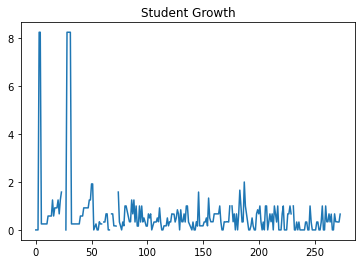

In [70]:
df['BOY-MOY Growth'].plot(title="Student Growth");

Since this analysis compares student's reading levels from the beginning of the school to the middle of school year, I expect to see a few cases of regression, no growth, and atleast a half a year of growth in reading levels. According to F&P Instructional Level Expectations for Reading, students can grow 3-4 levels within a school year. For example, a first grader is expected to enter the grade reading on level E or above and be on level K or above by the end of the school year. For this part of the analysis, I will isolate students who grew more than two grade levels and investigate their growth.